In [247]:
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
df_products = pd.read_csv('Skincare Database.csv', delimiter=',')
print(df_products.shape)
print(df_products.info())
display(df_products.head())

(99, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Brand                                     99 non-null     object
 1   Name of the product                       99 non-null     object
 2   Price                                     99 non-null     object
 3   Purpose                                   99 non-null     object
 4   Description                               99 non-null     object
 5     Time of Use (AM or PM)                  99 non-null     object
 6   How often to be used a week               99 non-null     object
 7   Key Ingredients                           95 non-null     object
 8   Ingredients                               99 non-null     object
 9   How to use (skin)                         99 non-null     object
 10  PH Level                                  9

,Brand,Name of the product,Price,Purpose,Description,Time of Use (AM or PM),How often to be used a week,Key Ingredients,Ingredients,How to use (skin),...,Skin Type,Is it safe for sensitive skin?,Age target,Helps with,Results showing in the period,What product should not be used together,UV sensitivity increase,How much to apply,Function,Unnamed: 20
0,The Inkey List,HYALURONIC ACID,$7.99,Hydrate,The product we would recommend to everyone. Hy...,AM/PM,No restrictions,2% Multi molecular Hyaluronic Acid\nMatrixyl 3...,"Water (Aqua/Eau), Propanediol, Sodium Hyaluron...","Clean, damp",...,Any,Yes,Any,Hydration; Glow; Reduce fine lines and wrinkle...,Immediately,N/A,No,Pea-sized,Hydrate,NaN
1,The Inkey List,RETINOL,$9.99,Treat,Your go-to ingredient for skin renewal.\n\nDer...,PM,3,1% RetiStar stabilised Retinol\n0.5% Granactiv...,"Water (Aqua / Eau), Glycerin, Butylene Glycol,...",Clean,...,"Aging, Oily",No,25~,Hydration; Calm red skin; Anti-aging,6 weeks,"Vitamin C, AHA",Yes,Pea-sized,Renews cells,NaN
2,The Inkey List,SNOW MUSHROOM MOISTURIZER,$9.99,Moisturize,"This super-hydrating, lightweight jelly moistu...",AM/PM,No restrictions,0.3% TREMELLA FUCIFORMIS EXTRACT PROVIDES A CO...,"Aqua (Water/ Eau), Butylene Glycol, Glycerin, ...","Clean, treated",...,Dry,Yes,Any,Hydration; Glow; Reduce redness,Immediately,N/A,No,Blueberry-sized,Seal the moisture,NaN
3,The Inkey List,CAFFEINE EYE CREAM,$9.99,Treat,This hydrating and lightweight under-eye cream...,AM/PM,No restrictions,Caffeine helps reduce puffiness\nMatrixyl 3000...,"Water (Aqua / Eau), Glycerin, Dicaprylyl Carbo...",Treated,...,Puffy eyes,Yes,Any,Under eye hydration; under eye brightening; re...,2 weeks,N/A,No,Pine nut sized,Diuretic,NaN
4,The Inkey List,BRIGHTEN-I EYE CREAM,$9.99,Treat,A brightening under-eye cream that combines sk...,AM/PM,No restrictions,BRIGHTENYL™ 2%: Works to brighten the eye cont...,"Aqua (Water/Eau), Cyclopentasiloxane, Coco-Cap...",Treated,...,Dark circles,Yes,Any,"Hydration; Under eye brightening, under eye pu...",immediately,N/A,Yes,Pine nut sized,Brighten,NaN


In [249]:
print(df_products['Purpose'].value_counts(sort=False))

Clean                       12
Sunscreen                    3
Moisturize + Sunscreen       3
Moisturize                  20
Hydrate                     11
Treat                       50
Name: Purpose, dtype: int64


In [250]:
df_products['Brand  '] = df_products['Brand  '].str.replace('Innisfree', 'innisfree')

In [251]:
print(df_products['Brand  '].value_counts(sort=True))

The Inkey List           35
THE ORDINARY             25
Paula's Choice           10
CeRaVe                    8
LA ROCHE POSAY            7
Neutrogena                5
innisfree                 4
CLINIQUE                  2
Youth to the people       1
Fresh                     1
LANEIGE                   1
Name: Brand  , dtype: int64


In [252]:
df_review = pd.read_csv('reviews.csv', delimiter=',',encoding= 'unicode_escape')
print(df_review.shape)
print(df_review.info())
display(df_review.head())

(99, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    99 non-null     object 
 1   Name of the product      99 non-null     object 
 2   Review grade             99 non-null     int64  
 3   Number of reviews        99 non-null     int64  
 4   Recommendation percent   28 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ KB
None


,Brand,Name of the product,Review grade,Number of reviews,Recommendation percent
0,The Inkey List,HYALURONIC ACID,5,1100,92.0
1,The Inkey List,RETINOL,5,756,91.0
2,The Inkey List,SNOW MUSHROOM MOISTURIZER,4,25,NaN
3,The Inkey List,CAFFEINE EYE CREAM,4,1054,82.0
4,The Inkey List,BRIGHTEN-I EYE CREAM,4,697,84.0


In [253]:
new_df = pd.merge(df_products, df_review,  how='left', left_on=['Brand  ', 'Name of the product'], right_on = ['Brand  ','Name of the product  '])
new_df = new_df.drop(['Unnamed: 20', 'Name of the product  '], axis=1)
print(new_df.shape)
print(new_df.info())
display(new_df.head())

(99, 23)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Brand                                     99 non-null     object 
 1   Name of the product                       99 non-null     object 
 2   Price                                     99 non-null     object 
 3   Purpose                                   99 non-null     object 
 4   Description                               99 non-null     object 
 5     Time of Use (AM or PM)                  99 non-null     object 
 6   How often to be used a week               99 non-null     object 
 7   Key Ingredients                           95 non-null     object 
 8   Ingredients                               99 non-null     object 
 9   How to use (skin)                         99 non-null     object 
 10  PH Level                       

,Brand,Name of the product,Price,Purpose,Description,Time of Use (AM or PM),How often to be used a week,Key Ingredients,Ingredients,How to use (skin),...,Age target,Helps with,Results showing in the period,What product should not be used together,UV sensitivity increase,How much to apply,Function,Review grade,Number of reviews,Recommendation percent
0,The Inkey List,HYALURONIC ACID,$7.99,Hydrate,The product we would recommend to everyone. Hy...,AM/PM,No restrictions,2% Multi molecular Hyaluronic Acid\nMatrixyl 3...,"Water (Aqua/Eau), Propanediol, Sodium Hyaluron...","Clean, damp",...,Any,Hydration; Glow; Reduce fine lines and wrinkle...,Immediately,N/A,No,Pea-sized,Hydrate,5.0,1100.0,92.0
1,The Inkey List,RETINOL,$9.99,Treat,Your go-to ingredient for skin renewal.\n\nDer...,PM,3,1% RetiStar stabilised Retinol\n0.5% Granactiv...,"Water (Aqua / Eau), Glycerin, Butylene Glycol,...",Clean,...,25~,Hydration; Calm red skin; Anti-aging,6 weeks,"Vitamin C, AHA",Yes,Pea-sized,Renews cells,5.0,756.0,91.0
2,The Inkey List,SNOW MUSHROOM MOISTURIZER,$9.99,Moisturize,"This super-hydrating, lightweight jelly moistu...",AM/PM,No restrictions,0.3% TREMELLA FUCIFORMIS EXTRACT PROVIDES A CO...,"Aqua (Water/ Eau), Butylene Glycol, Glycerin, ...","Clean, treated",...,Any,Hydration; Glow; Reduce redness,Immediately,N/A,No,Blueberry-sized,Seal the moisture,4.0,25.0,NaN
3,The Inkey List,CAFFEINE EYE CREAM,$9.99,Treat,This hydrating and lightweight under-eye cream...,AM/PM,No restrictions,Caffeine helps reduce puffiness\nMatrixyl 3000...,"Water (Aqua / Eau), Glycerin, Dicaprylyl Carbo...",Treated,...,Any,Under eye hydration; under eye brightening; re...,2 weeks,N/A,No,Pine nut sized,Diuretic,4.0,1054.0,82.0
4,The Inkey List,BRIGHTEN-I EYE CREAM,$9.99,Treat,A brightening under-eye cream that combines sk...,AM/PM,No restrictions,BRIGHTENYL™ 2%: Works to brighten the eye cont...,"Aqua (Water/Eau), Cyclopentasiloxane, Coco-Cap...",Treated,...,Any,"Hydration; Under eye brightening, under eye pu...",immediately,N/A,Yes,Pine nut sized,Brighten,4.0,697.0,84.0


In [254]:
new_df.isna().sum()

Brand                                        0
Name of the product                          0
Price                                        0
Purpose                                      0
Description                                  0
  Time of Use (AM or PM)                     0
How often to be used a week                  0
Key Ingredients                              4
Ingredients                                  0
How to use (skin)                            0
PH Level                                     0
Skin Type                                    0
Is it safe for sensitive skin?               0
Age target                                   0
Helps with                                   0
Results showing in the period                1
What product should not be used together     0
UV sensitivity increase                      0
How much to apply                            0
Function                                     0
Review grade                                 5
Number of rev

In [255]:
uniq_product = new_df['Name of the product'].nunique()
print("Number of unique products :",uniq_product)

Number of unique products : 99


/Users/iniad/miniconda3/envs/ds2020/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/iniad/miniconda3/envs/ds2020/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 2.,  0., 69.,  0., 22.,  0.,  0.,  0.,  0.,  1.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

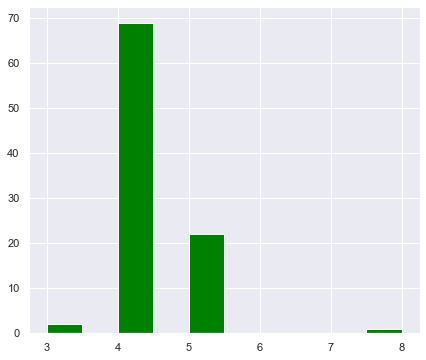

In [256]:
plt.subplots(figsize = (7,6))
plt.hist(new_df['Review grade'],color="green")

In [257]:
matrix_pivot = pd.pivot_table(new_df,values='Review grade',index='Number of reviews ',columns='Name of the product').fillna(0)
matrix_pivot.head()


Name of the product,\n\nHYALU B5 PURE HYALURONIC ACID SERUM,\nTHERMAL SPRING WATER FACE MIST,"""Buffet""","""Buffet"" + Copper Peptides 1%",1% Retinol Treatment,10% Niacinamide Booster,100% Organic Cold-Pressed Borage Seed Oil\n,100% Organic Cold-Pressed Moroccan Argan Oil\n,100% Plant-derived Squalane,15% VITAMIN C + EGF SERUM,...,Superfood Antioxidant Cleanser,TOLERIANE DOUBLE REPAIR FACIAL MOISTURIZER WITH SPF,TOLERIANE ULTRA MOISTURIZING CREAM,TRANEXAMIC ACID NIGHT TREATMENT,TURMERIC MOISTURIZER,Take The Day Off Cleansing Balm,Tangerine Brightening & Pore-Refining Moisturizer,"VITAMIN B, C AND E MOISTURIZER",VITAMIN C 30%,Youth-Extending Daily Hydrating Fluid SPF 50
Number of reviews,,,,,,,,,,,,,,,,,,,,,
8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [258]:
new_df.sort_values('Number of reviews ', ascending=False)

,Brand,Name of the product,Price,Purpose,Description,Time of Use (AM or PM),How often to be used a week,Key Ingredients,Ingredients,How to use (skin),...,Age target,Helps with,Results showing in the period,What product should not be used together,UV sensitivity increase,How much to apply,Function,Review grade,Number of reviews,Recommendation percent
77,CeRaVe,Daily Moisturizing Lotion,11.24 $,Moisturize,CeraVe Daily Moisturizing Lotion replenishes ...,AM,No restrictions,N/A,"Aqua / Water / Eau, Glycerin, Caprylic/Capric ...","Clean, treated",...,Any,Hydration; Clearer skin,N/A,N/A,No,Pea-sized,Seal the moisture,5.0,31767.0,NaN
75,CeRaVe,Hydrating cleanser for normal-to-dry skin,14.64 $,Clean,CeraVe Hydrating Facial Cleanser is a gentle f...,AM/PM,No restrictions,N/A,"Aqua / Water / Eau, Glycerin, Cetearyl Alcohol...",Dirty,...,Any,Hydration; Glow; Clearer skin,N/A,N/A,No,Pea-sized,Cleanse,5.0,25691.0,NaN
76,CeRaVe,Foaming facial cleanser for normal-to-oily skin,15.84 $,Clean,CeraVe Foaming Facial Cleanser features cerami...,AM/PM,No restrictions,N/A,"Aqua / Water / Eau, Cocamidopropyl Hydroxysult...",Dirty,...,Any,"Hydration; Clearer skin, Excess oil control",N/A,N/A,No,Pea-sized,Cleanse,5.0,13034.0,NaN
97,LANEIGE,Lip Sleeping Mask,22.00 $,Moisturize,Lip Sleeping Mask has a softening balm texture...,PM,No restrictions,Moisture Wrap™ Technology: Features a mineral...,"\nDiisostearyl Malate, Hydrogenated Polyisobut...",Clean,...,Any,"Hydration, plump skin",N/A,N/A,No,Pea-sized,Renews cells,4.0,11907.0,NaN
74,CeRaVe,Facial Moisturizing Lotion PM,15.99 $,Moisturize,Skin needs moisture around the clock. A night ...,PM,No restrictions,N/A,"Aqua / Water / Eau, Glycerin, Caprylic/Capric ...","Clean, treated",...,Any,Hydration; Calm red skin,N/A,N/A,No,Pea-sized,Seal the moisture,5.0,11057.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,THE ORDINARY,B' oil,$11.00,Hydrate,B” Oil solubilizes a purified form of micro-al...,AM/PM,No restrictions,N/A,"Caprylic/Capric Triglyceride, Squalane, Crambe...","Clean, treated",...,Any,Hydration; Protect against pollution,N/A,N/A,No,2-3 drops,Hydrate,NaN,NaN,NaN
80,Neutrogena,Rapid Wrinkle Repair® Regenerating Retinol Cre...,28.49 $,Treat,\nDETAILS\nBenefits\n\nRapid Wrinkle Repair® R...,AM/PM,No restrictions,N/A,"Water, Pentaerythrityl Tetraethylhexanoate, Gl...","Clean, hydrated",...,Any,Hydration; Anti-aging; Plump skin,N/A,N/A,No,Pea-sized,Seal the moisture,NaN,NaN,NaN
89,innisfree,Green Tea Hydrating Cleansing Foam,10.00 $,Clean,A creamy cleansing foam with Jeju green tea th...,AM/PM,No restrictions,Jeju Green Tea Extract: Replenishes hydration....,"Water / Aqua / Eau, Glycerin, Myristic Acid, S...",Dirty,...,Any,"Hydration, Soothing skin",N/A,N/A,No,Pea-sized,Cleanse,NaN,NaN,NaN
90,innisfree,Fermented Soybean Firming Energy Essence,39.00 $,Treat,A hydrating essence that helps visibly improve...,AM/PM,No restrictions,"Fermented Soybean Extract: Antioxidant-rich, a...","Water, Propanediol, Bacillus/Soybean Ferment E...",Clean,...,Any,"Hydration, Even skin texture",N/A,N/A,No,2-3 drops,Hydrate,NaN,NaN,NaN


**Scoring by weighted rating**

In [259]:
ave_r=new_df['Review grade'].mean()

In [260]:
min_r=new_df['Number of reviews '].min()
max_r= new_df['Number of reviews '].max()
print('Minimum and maximum number of reviews: ', min_r,',', max_r)

Minimum and maximum number of reviews:  8.0 , 31767.0


In [261]:
# Function that computes the weighted rating of each product
def weighted_rating(new_df, m=min_r, C=ave_r):
    v = new_df['Number of reviews ']
    R = new_df['Review grade']
    # Calculation based 
    return (v/(v+m) * R) + (m/(m+v) * C)

In [262]:
new_df['score'] = new_df.apply(weighted_rating, axis=1)

In [263]:
new_df.sort_values('score', ascending=False)

,Brand,Name of the product,Price,Purpose,Description,Time of Use (AM or PM),How often to be used a week,Key Ingredients,Ingredients,How to use (skin),...,Helps with,Results showing in the period,What product should not be used together,UV sensitivity increase,How much to apply,Function,Review grade,Number of reviews,Recommendation percent,score
56,THE ORDINARY,"""Buffet"" + Copper Peptides 1%",$34.00,Treat,This formula combines a comprehensive array of...,AM/PM,No restrictions,Copper Peptides 1%,"Aqua (Water), Glycerin, Lactococcus Ferment Ly...","Clean, hydrated",...,Hydration; Anti-aging; Plump skin,N/A,"AHA, BHA, EUK 134 0.1%, Pure Vitamin C (LAA/EL...",No,2 drops,Hydrate,8.0,161.0,NaN,7.822737
77,CeRaVe,Daily Moisturizing Lotion,11.24 $,Moisturize,CeraVe Daily Moisturizing Lotion replenishes ...,AM,No restrictions,N/A,"Aqua / Water / Eau, Glycerin, Caprylic/Capric ...","Clean, treated",...,Hydration; Clearer skin,N/A,N/A,No,Pea-sized,Seal the moisture,5.0,31767.0,NaN,4.999813
75,CeRaVe,Hydrating cleanser for normal-to-dry skin,14.64 $,Clean,CeraVe Hydrating Facial Cleanser is a gentle f...,AM/PM,No restrictions,N/A,"Aqua / Water / Eau, Glycerin, Cetearyl Alcohol...",Dirty,...,Hydration; Glow; Clearer skin,N/A,N/A,No,Pea-sized,Cleanse,5.0,25691.0,NaN,4.999768
76,CeRaVe,Foaming facial cleanser for normal-to-oily skin,15.84 $,Clean,CeraVe Foaming Facial Cleanser features cerami...,AM/PM,No restrictions,N/A,"Aqua / Water / Eau, Cocamidopropyl Hydroxysult...",Dirty,...,"Hydration; Clearer skin, Excess oil control",N/A,N/A,No,Pea-sized,Cleanse,5.0,13034.0,NaN,4.999543
74,CeRaVe,Facial Moisturizing Lotion PM,15.99 $,Moisturize,Skin needs moisture around the clock. A night ...,PM,No restrictions,N/A,"Aqua / Water / Eau, Glycerin, Caprylic/Capric ...","Clean, treated",...,Hydration; Calm red skin,N/A,N/A,No,Pea-sized,Seal the moisture,5.0,11057.0,NaN,4.999462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,THE ORDINARY,B' oil,$11.00,Hydrate,B” Oil solubilizes a purified form of micro-al...,AM/PM,No restrictions,N/A,"Caprylic/Capric Triglyceride, Squalane, Crambe...","Clean, treated",...,Hydration; Protect against pollution,N/A,N/A,No,2-3 drops,Hydrate,NaN,NaN,NaN,NaN
80,Neutrogena,Rapid Wrinkle Repair® Regenerating Retinol Cre...,28.49 $,Treat,\nDETAILS\nBenefits\n\nRapid Wrinkle Repair® R...,AM/PM,No restrictions,N/A,"Water, Pentaerythrityl Tetraethylhexanoate, Gl...","Clean, hydrated",...,Hydration; Anti-aging; Plump skin,N/A,N/A,No,Pea-sized,Seal the moisture,NaN,NaN,NaN,NaN
89,innisfree,Green Tea Hydrating Cleansing Foam,10.00 $,Clean,A creamy cleansing foam with Jeju green tea th...,AM/PM,No restrictions,Jeju Green Tea Extract: Replenishes hydration....,"Water / Aqua / Eau, Glycerin, Myristic Acid, S...",Dirty,...,"Hydration, Soothing skin",N/A,N/A,No,Pea-sized,Cleanse,NaN,NaN,NaN,NaN
90,innisfree,Fermented Soybean Firming Energy Essence,39.00 $,Treat,A hydrating essence that helps visibly improve...,AM/PM,No restrictions,"Fermented Soybean Extract: Antioxidant-rich, a...","Water, Propanediol, Bacillus/Soybean Ferment E...",Clean,...,"Hydration, Even skin texture",N/A,N/A,No,2-3 drops,Hydrate,NaN,NaN,NaN,NaN


**Sunscreen**

In [264]:
sun_data = new_df.loc[new_df['Purpose'] == 'Sunscreen  ']

In [265]:
sun_data =sun_data.append(new_df.loc[new_df['Purpose'] == 'Moisturize + Sunscreen  '], ignore_index=True)
display(sun_data)

,Brand,Name of the product,Price,Purpose,Description,Time of Use (AM or PM),How often to be used a week,Key Ingredients,Ingredients,How to use (skin),...,Helps with,Results showing in the period,What product should not be used together,UV sensitivity increase,How much to apply,Function,Review grade,Number of reviews,Recommendation percent,score
0,Paula's Choice,Youth-Extending Daily Hydrating Fluid SPF 50,$33.00,Sunscreen,An innovative water-light formula that contain...,AM,No restrictions,Avobenzone 2.0%\n Octinoxate 7.50%\nOctisalate...,"Water (Aqua), Glycerin (hydration/skin repleni...","Clean, moisturized",...,Protect against sun,N/A,N/A,No,Pea-sized,Protect the barrier,4.0,297.0,NaN,4.006697
1,Paula's Choice,Redness Relief SPF 30 Mineral Moisturizer for ...,$29.00,Sunscreen,A mineral-based sunscreen that replenishes dry...,AM,No restrictions,Titanium Dioxide 3.85%\n Zinc Oxide 3.12%,"Water (Aqua), C12-15 Alkyl Benzoate (texture-e...","Clean, moisturized",...,Protect against sun,N/A,N/A,No,Pea-sized,Protect the barrier,4.0,120.0,NaN,4.015957
2,Neutrogena,Sheer Zinc Face Dry-Touch Sunscreen Broad Spec...,12.99 $,Sunscreen,Neutrogena Sheer Zinc™ Face Sunscreen Lotion B...,AM,No restrictions,Zinc oxide 21.6%,"Water, C12-15 Alkyl Benzoate, Octyldodecyl Cit...","Clean, moisturized",...,Protect against sun,N/A,N/A,No,Pea-sized,Protect the barrier,4.0,193.0,NaN,4.010162
3,Paula's Choice,Skin Restoring Moisturizer with SPF 50,33.00 $,Moisturize + Sunscreen,This antioxidant-rich moisturizer hydrates and...,AM,No restrictions,Avobenzone 3%; Homosalate 5%; Octinoxate 7.50%...,"Water (Aqua), Silica (opacifier and texture en...","Clean, treated",...,Protect against sun,N/A,N/A,No,Grape-sized,Protect the barrier,4.0,115.0,NaN,4.016606
4,CeRaVe,Mineral moisturizer with SPF,13.47 $,Moisturize + Sunscreen,CeraVe AM Facial Moisturizer is a morning skin...,AM,No restrictions,"Homosalate (10%), Meradimate (5%), Octinoxate ...","Water, Niacinamide, Glycerin, Cetearyl Alcohol...","Treated, damp",...,Protect against sun,NaN,N/A,No,Pea-sized,Protect the barrier,4.0,1283.0,NaN,4.001582
5,LA ROCHE POSAY,TOLERIANE DOUBLE REPAIR FACIAL MOISTURIZER WIT...,19.99 $,Moisturize + Sunscreen,iscover Prebiotic Skincare. This oil-free faci...,AM,No restrictions,Ceramide-3\nNiacinamide\nGlycerin\nLa Roche-Po...,WATER (LA ROCHE-POSAY PREBIOTIC THERMAL WATER)...,"Clean, treated",...,"Hydration, Protect against sun",N/A,N/A,No,Pea-sized,Seal the moisture,4.0,473.0,NaN,4.004246


**Description based**


In [266]:
new_df['Description'].head()

0    The product we would recommend to everyone. Hy...
1    Your go-to ingredient for skin renewal.\n\nDer...
2    This super-hydrating, lightweight jelly moistu...
3    This hydrating and lightweight under-eye cream...
4    A brightening under-eye cream that combines sk...
Name: Description, dtype: object

In [267]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
new_df['Description'] = new_df['Description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(new_df['Description'])

# For the other features
other_matrix = some_processing_on_other_columns()
sparse.hstack((tfidf_matrix, other_matrix))


In [268]:
tfidf_matrix .shape

(99, 1399)

In [269]:
tfidf.get_feature_names()[1300:1399]

['tone',
 'toner',
 'tones',
 'toning',
 'topical',
 'topmost',
 'total',
 'touch',
 'trademark',
 'tranexamic',
 'transforms',
 'trap',
 'treatment',
 'treatments',
 'treats',
 'trees',
 'triclocarban',
 'triclosan',
 'triglycerides',
 'tripeptide',
 'truly',
 'turmeric',
 'turn',
 'twice',
 'types',
 'ultra',
 'unbalanced',
 'unblock',
 'unblocks',
 'unclog',
 'unclogs',
 'undergoes',
 'uneven',
 'uniform',
 'union',
 'unique',
 'uniquely',
 'unstable',
 'unsticks',
 'upper',
 'ups',
 'urea',
 'usda',
 'use',
 'used',
 'users',
 'uses',
 'using',
 'utility',
 'uva',
 'uvb',
 'variation',
 'varies',
 'various',
 'varying',
 'vera',
 'versus',
 'vingear',
 'viscosity',
 'visible',
 'visibly',
 'vital',
 'vitamin',
 'vitamins',
 'volcanic',
 'wake',
 'walls',
 'warnings',
 'wash',
 'water',
 'way',
 'ways',
 'week',
 'weeks',
 'weeksdaily',
 'weight',
 'weights',
 'whilst',
 'whisking',
 'white',
 'wide',
 'winning',
 'witch',
 'won',
 'wonders',
 'wont',
 'work',
 'working',
 'works',


In [270]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [271]:
cosine_sim.shape

(99, 99)

In [272]:
#Construct a reverse map of indices and names
indices = pd.Series(new_df.index, index=new_df['Name of the product']).drop_duplicates()
indices.head(10)

Name of the product
HYALURONIC ACID                0
RETINOL                        1
SNOW MUSHROOM MOISTURIZER      2
CAFFEINE EYE CREAM             3
BRIGHTEN-I EYE CREAM           4
RETINOL EYE CREAM              5
NIACINAMIDE                    6
LACTIC ACID                    7
SALICYLIC ACID CLEANSER        8
COLLAGEN BOOSTER               9
dtype: int64

In [273]:
# Function that takes in names as input and outputs most similar ones
def get_recommendations(name, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[name]

    # Get the pairwsie similarity scores 
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar 
    sim_scores = sim_scores[1:11]

    # Getindices
    product_indices = [i[0] for i in sim_scores]

    # 
    return new_df['Name of the product'].iloc[product_indices]

<h3>Similar product recommendation</h3>

In [274]:
get_recommendations('Green Tea Hydrating Cleansing Foam')

90             Fermented Soybean Firming Energy Essence
94                       Superfood Antioxidant Cleanser
30                               HEMP OIL MOISTURIZER  
91    Tangerine Brightening & Pore-Refining Moisturizer
88                      Pore clearing facial scrub foam
8                             SALICYLIC ACID CLEANSER  
21                                           SQUALANE  
16                                      VITAMIN C 30%  
84                             Clear Pore Cleanser/Mask
38                                  Squalane Cleanser  
Name: Name of the product, dtype: object

<h2>Visualizations</h2>

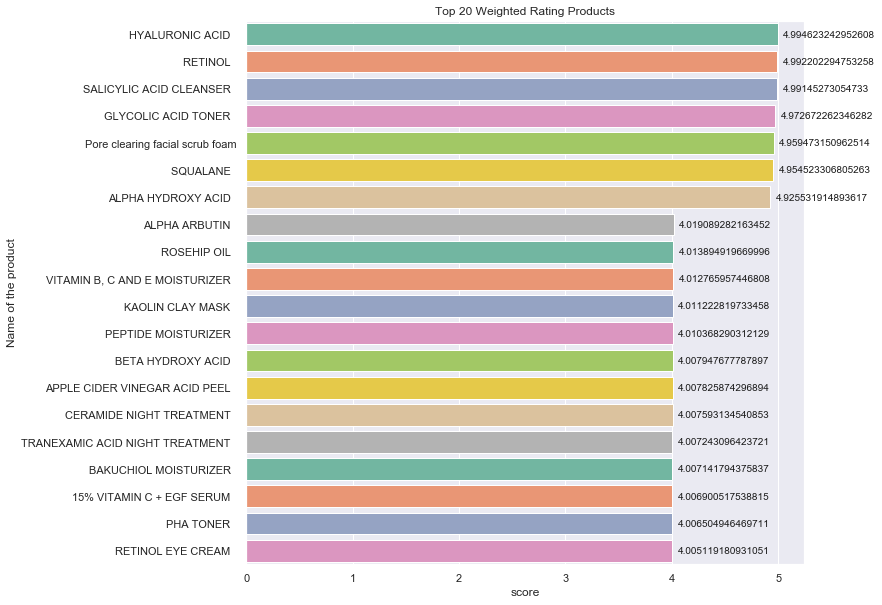

In [241]:
import seaborn as sns
total_20 = new_df.sort_values(by='score', ascending=False).head(20)
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="score", y='Name of the product', data=total_20, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.title("Top 20 Weighted Rating Products")
plt.show()

In [141]:
total_brand = new_df.groupby(by=['Brand  ']).agg({'Name of the product': ['nunique']})
total_brand.columns = ['total_brand']
total_brand.reset_index(inplace=True)
total_brand = total_brand.sort_values(by=['total_brand'], ascending=False)
total_brand.head()

,Brand,total_brand
8,The Inkey List,35
7,THE ORDINARY,25
6,Paula's Choice,10
1,CeRaVe,8
3,LA ROCHE POSAY,7


In [143]:
total_rating = new_df.drop_duplicates(subset=['Brand  ', 'Name of the product'], keep='first')
total_rating = total_rating.groupby(by=['Brand  ']).agg({'score': ['sum']})
total_rating.columns = ['total_rating']
total_rating.reset_index(inplace=True)
total_rating = total_rating.sort_values(by=['total_rating'], ascending=False)
total_rating

,Brand,total_rating
8,The Inkey List,144.291158
7,THE ORDINARY,101.978419
6,Paula's Choice,40.067536
1,CeRaVe,38.995865
3,LA ROCHE POSAY,32.850433
5,Neutrogena,16.025789
10,innisfree,9.087133
0,CLINIQUE,4.998473
2,Fresh,4.001181
9,Youth to the people,4.000639


In [146]:
avg_brand = pd.merge(total_brand, total_rating, on='Brand  ', how='outer')
avg_brand['average_rating'] = round(avg_brand['total_rating'] / avg_brand['total_brand'], 2)
avg_brand = avg_brand[avg_brand['total_brand'] > 2]
avg_brand = avg_brand.sort_values(by=['average_rating'], ascending=False)
avg_brand

,Brand,total_brand,total_rating,average_rating
3,CeRaVe,8,38.995865,4.87
4,LA ROCHE POSAY,7,32.850433,4.69
0,The Inkey List,35,144.291158,4.12
1,THE ORDINARY,25,101.978419,4.08
2,Paula's Choice,10,40.067536,4.01
5,Neutrogena,5,16.025789,3.21
6,innisfree,4,9.087133,2.27


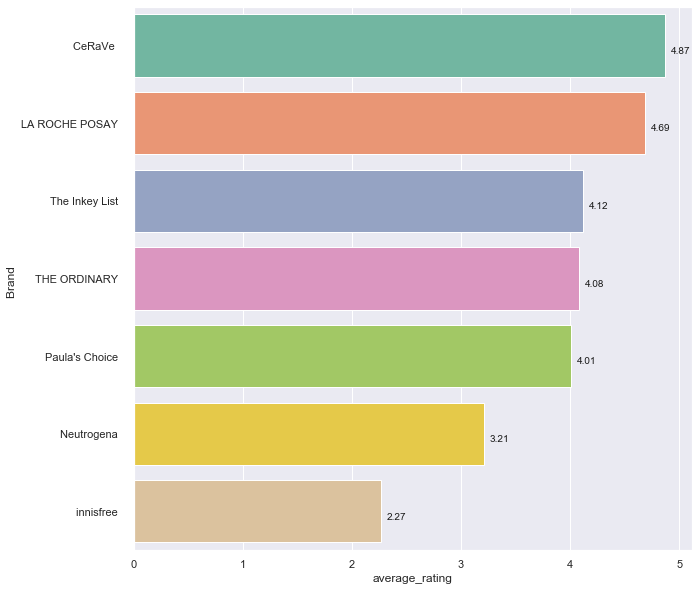

In [148]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="average_rating", y="Brand  ", data=avg_brand, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

<h2>Recommendation system</h2>

In [231]:
def get_list(x):
    if isinstance(x, list):
        names = [i['Name of the product'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [ ]:
metadata['director'] = metadata['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    metadata[feature] = metadata[feature].apply(get_list)

In [186]:
print(new_df['Skin Type'].value_counts(sort=False))

Dehydrated Sensitive Red             3
Oily sensitive                       1
Sensitive dry normal                 1
Any                                  4
Dry Aging                            2
Uneven skin texture                  3
Oily Dry                             2
Dehydrated Sensitive                 2
Dry Uneven skin texture              3
Acne-prone Blemishes Oily            5
Huge pores  Uneven skin texture      1
Aging                                6
Extra-dry uneven skin texture        1
Acne-prone Blemishes                 6
Oily Dry Sensitive                   1
Aging Uneven skin texture            4
Dry Irritation                       1
Puffy eyes                           1
Sensitive oily                       1
Sensitive dry                        7
Uneven skin texture Aging            1
Dull skin uneven skin texture        8
Allergy-prone                        1
Hyperpigmentation                    4
Aging Uneven skin texture Dry        1
Oily acne-prone uneven to

In [31]:
new_df['Skin Type'] = new_df['Skin Type'].replace({',':''}, regex=True)
print(new_df['Skin Type'].value_counts(sort=False))

Dehydrated Sensitive Red             3
Oily sensitive                       1
Sensitive dry normal                 1
Any                                  4
Dry Aging                            2
Uneven skin texture                  3
Oily Dry                             2
Dehydrated Sensitive                 2
Dry Uneven skin texture              3
Acne-prone Blemishes Oily            5
Huge pores  Uneven skin texture      1
Aging                                6
Extra-dry uneven skin texture        1
Acne-prone Blemishes                 6
Oily Dry Sensitive                   1
Aging Uneven skin texture            4
Dry Irritation                       1
Puffy eyes                           1
Sensitive oily                       1
Sensitive dry                        7
Uneven skin texture Aging            1
Dull skin uneven skin texture        8
Allergy-prone                        1
Hyperpigmentation                    4
Aging Uneven skin texture Dry        1
Oily acne-prone uneven to

In [32]:
print(new_df['Helps with'].value_counts(sort=False))

Hydration                                                                        1
Hydration; Gentle exfoliation; Protection against pollution                      1
Hydration; Nourish skin; Anti-aging                                              1
Hydration; Control excess oil;  Reduce blemishes                                 2
Hydration; Brighter skin, Even skin tone                                         3
Hydration, Smaller pores, Control excess oil                                     1
Hydration;Aging;Plump Skin                                                       1
Soothing skin                                                                    1
Under eye Hydration; Anti-aging                                                  1
Hydration;  Protect against pollution                                           10
Hydration; Calm red skin; Anti-aging                                             2
Hydration; Anti-aging                                                            2
Hydr

In [238]:
min_common_items = 1

def predict_scores(df_sim, ser_target):
    ret = {}
    for item1 in df_sim.index:  # not yet rated by the target user
        v1 = df_sim.loc[item1]
        if v1.sum() > 0:  # debug
            print('v1:',v1)  # debug
        if v1.sum() < min_common_items: continue
        v11 = v1
        t11 = ser_target[ v1 ]
        pred1 = (v11 * t11).sum() / np.abs(v11).sum()
        print('v11:',v11)  # debug
        print('t11:',t11)  # debug
        print('pred1:',pred1)  # debug
        ret[item1] = pred1
    
    ser_ret = pd.Series(ret)
    
    return ser_ret.sort_values(ascending=False)

In [239]:
def get_recomm_by_item_sim(df, target_dic):
    ser_target = pd.Series(target_dic)
    print(target_dic)  # debug
    print(ser_target)  # debug
    # make dataframe with columns included in target_dic
    #print(df.shape)  # debug
    df_scores = df['score']
    #print(df_scores.shape)  # debug
    # drop rows included in target_dic (already rated)
    #df_scores = df_scores.drop(index=ser_target.index)
    #print(df_scores.shape)  # debug
    #display(df_scores.head())  # debug
    recomm = predict_scores(df_scores, ser_target)
    
    return recomm

In [240]:
recomm = get_recomm_by_item_sim(new_df,
                                {"Purpose":'Clean', 'Skin Type':'Oily','Function':'Cleanse', 'score':4.5, 'Helps with':'Hydration'})
print('Number of items calculated:', len(recomm))
print('Recommendation:')
print(recomm.head())


{'Purpose': 'Clean', 'Skin Type': 'Oily', 'Function': 'Cleanse', 'score': 4.5, 'Helps with': 'Hydration'}
Purpose           Clean
Skin Type          Oily
Function        Cleanse
score               4.5
Helps with    Hydration
dtype: object
v1: 4.994623242952608


TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [4.994623242952608] of <class 'numpy.float64'>

In [49]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Brand                                     99 non-null     object 
 1   Name of the product                       99 non-null     object 
 2   Price                                     99 non-null     object 
 3   Purpose                                   99 non-null     object 
 4   Description                               99 non-null     object 
 5     Time of Use (AM or PM)                  99 non-null     object 
 6   How often to be used a week               99 non-null     object 
 7   Key Ingredients                           95 non-null     object 
 8   Ingredients                               99 non-null     object 
 9   How to use (skin)                         99 non-null     object 
 10  PH Level                                